# NOTEBOOK MUST BE RUN IN ENV: netflix_proj_env

In [1]:
!conda env list

# conda environments:
#
                         C:\Program Files\Orange
base                     C:\ProgramData\Anaconda3
ChatDev_conda_env        C:\Users\PhillipRashaad\.conda\envs\ChatDev_conda_env
PandasProfileEnv         C:\Users\PhillipRashaad\.conda\envs\PandasProfileEnv
SMOP_env                 C:\Users\PhillipRashaad\.conda\envs\SMOP_env
autogen_autobuild_env     C:\Users\PhillipRashaad\.conda\envs\autogen_autobuild_env
autogen_studio_env       C:\Users\PhillipRashaad\.conda\envs\autogen_studio_env
automemgpt_env           C:\Users\PhillipRashaad\.conda\envs\automemgpt_env
classy_env               C:\Users\PhillipRashaad\.conda\envs\classy_env
crewai_env               C:\Users\PhillipRashaad\.conda\envs\crewai_env
crewai_poetry_env        C:\Users\PhillipRashaad\.conda\envs\crewai_poetry_env
cupy_tut                 C:\Users\PhillipRashaad\.conda\envs\cupy_tut
datascienv               C:\Users\PhillipRashaad\.conda\envs\datascienv
flask_env                C:\Users\PhillipRash

# 1. LOAD DATA

In [3]:
#!pip install openpyxl

  Using cached openpyxl-3.1.2-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl.metadata (1.8 kB)
Using cached openpyxl-3.1.2-py2.py3-none-any.whl (249 kB)
Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)


In [5]:
import pandas as pd

# Load the Excel file
#NOTE: The headers start at B6 & end on E6
netflix_df = pd.read_excel('00 - NETFLIX - Netflix_Engagement_Report_2023Jan-Jun.xlsx', header=5, usecols="B:E")

# Display the first few rows of the dataframe
print(netflix_df.shape)

netflix_df.head()


(18214, 4)


,Title,Available Globally?,Release Date,Hours Viewed
0,The Night Agent: Season 1,Yes,2023-03-23,812100000
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000
3,Wednesday: Season 1,Yes,2022-11-23,507700000
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000


In [6]:
#List all column names
netflix_df.columns

Index(['Title', 'Available Globally?', 'Release Date', 'Hours Viewed'], dtype='object')

In [7]:
#Create rename colummn dict
rename_dict = {'Title':'title', 'Available Globally?':'available_globally', 'Release Date':'release_date', 'Hours Viewed':'hours_viewed'}

rename_dict

{'Title': 'title',
 'Available Globally?': 'available_globally',
 'Release Date': 'release_date',
 'Hours Viewed': 'hours_viewed'}

In [8]:
# Rename the columns using the rename dictionary
netflix_df.rename(columns=rename_dict, inplace=True)

# Display the first few rows of the dataframe to verify the renaming
print(netflix_df.shape)

netflix_df.head()

(18214, 4)


,title,available_globally,release_date,hours_viewed
0,The Night Agent: Season 1,Yes,2023-03-23,812100000
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000
3,Wednesday: Season 1,Yes,2022-11-23,507700000
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000


# 2. EDA: Raw Engagement Data


# 2A. YDATA PROFILING (Pandas-Profiling)

**Low Code EDA REPORT**

**DOCS URL:** https://docs.profiling.ydata.ai/latest/getting-started/quickstart/



### Data Dictionary for the Netflix Engagement Report 2023 Dataset

| Column Name         | Data Type | Description                                                       |
|---------------------|-----------|-------------------------------------------------------------------|
| Title               | object    | The name of the movie or TV show.                                 |
| Available Globally  | object    | Indicates if the title is available for streaming worldwide (Yes/No). |
| Release Date        | datetime  | The release date of the title. Note: Many entries are missing.    |
| Hours Viewed        | int64     | The total hours that the title was viewed.                        |

### Notes:
- The `Release Date` column contains missing values for a significant portion of the dataset. Only 4,855 out of 18,214 entries have non-null release dates.
- `Hours Viewed` represents the aggregate viewership, reflecting the popularity and engagement of each title.
- The dataset provides insights into global availability, indicating Netflix's distribution strategy.
- This dataset allows for analysis of content trends over time, especially with the inclusion of `Release Date` and `Hours Viewed`.

In [9]:
#CHeck info of table
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18214 entries, 0 to 18213
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   title               18214 non-null  object        
 1   available_globally  18214 non-null  object        
 2   release_date        4855 non-null   datetime64[ns]
 3   hours_viewed        18214 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 569.3+ KB


In [10]:
#Convert Release Date to date time 
netflix_df['release_date'] = pd.to_datetime(netflix_df['release_date'])

netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18214 entries, 0 to 18213
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   title               18214 non-null  object        
 1   available_globally  18214 non-null  object        
 2   release_date        4855 non-null   datetime64[ns]
 3   hours_viewed        18214 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 569.3+ KB


In [12]:
!pip install ipywidgets

In [15]:
%%time 

from ydata_profiling import ProfileReport

#To generate the standard profiling report
profile = ProfileReport(netflix_df, title="Pandas Profiling Report - Netflix_Raw")

#Save report as html
#profile.to_file("02 - EDA - Pandas_Profiling_Report - Netflix_Raw.html")

#Display report in NOTEBOOK
#profile.to_notebook_iframe()

CPU times: total: 0 ns
Wall time: 24 ms


## 2B. MANUAL EDA - HIGH LEVEL


Here are the visual insights from the Exploratory Data Analysis (EDA) of the Netflix Engagement Report for 2023:

- **Distribution of Global Availability**: The first bar chart reveals a significant difference in the number of titles available globally versus those not available globally. With 4,514 (25%) titles available globally, there's a larger proportion, 13,700 (75%) titles, that are not available for streaming worldwide.

- **Viewership Distribution**: The histogram, using a logarithmic scale due to the wide range of viewership hours, showcases the distribution of "Hours Viewed" across titles. Most titles have relatively low viewership hours, with a few exceptions reaching extremely high viewership, indicating a long-tail distribution where a small number of titles capture the majority of viewing hours.

- **Distribution of Release Years for Netflix Titles**: The bar chart shows annual title releases from 2010 to 2023, revealing a steady increase that peaks in 2022. Data for 2023 only covers January to June.

These visuals provide a high-level overview of the Netflix content landscape in terms of availability, viewership, and release timing, highlighting trends and patterns that can inform deeper analyses or strategic decisions.

In [16]:
netflix_df.columns

Index(['title', 'available_globally', 'release_date', 'hours_viewed'], dtype='object')

In [17]:
netflix_data = netflix_df.copy()

# Analyzing the distribution of global availability
global_availability_counts = netflix_data['available_globally'].value_counts()

# Analyzing the distribution of Hours Viewed
hours_viewed_summary = netflix_data['hours_viewed'].describe()

# Preparing data for release date analysis - we need to convert Release Date to datetime and extract year for those with non-null values
netflix_data['release_date'] = pd.to_datetime(netflix_data['release_date'], errors='coerce')
netflix_data['Release Year'] = netflix_data['release_date'].dt.year

release_year_counts = netflix_data['Release Year'].value_counts().sort_index()

global_availability_counts, hours_viewed_summary, release_year_counts

(available_globally
 No     13700
 Yes     4514
 Name: count, dtype: int64,
 count    1.821400e+04
 mean     5.130954e+06
 std      1.871767e+07
 min      1.000000e+05
 25%      2.000000e+05
 50%      7.000000e+05
 75%      3.400000e+06
 max      8.121000e+08
 Name: hours_viewed, dtype: float64,
 Release Year
 2010.0      8
 2011.0      3
 2012.0      1
 2013.0     12
 2014.0     28
 2015.0     79
 2016.0    192
 2017.0    361
 2018.0    595
 2019.0    698
 2020.0    779
 2021.0    814
 2022.0    956
 2023.0    329
 Name: count, dtype: int64)

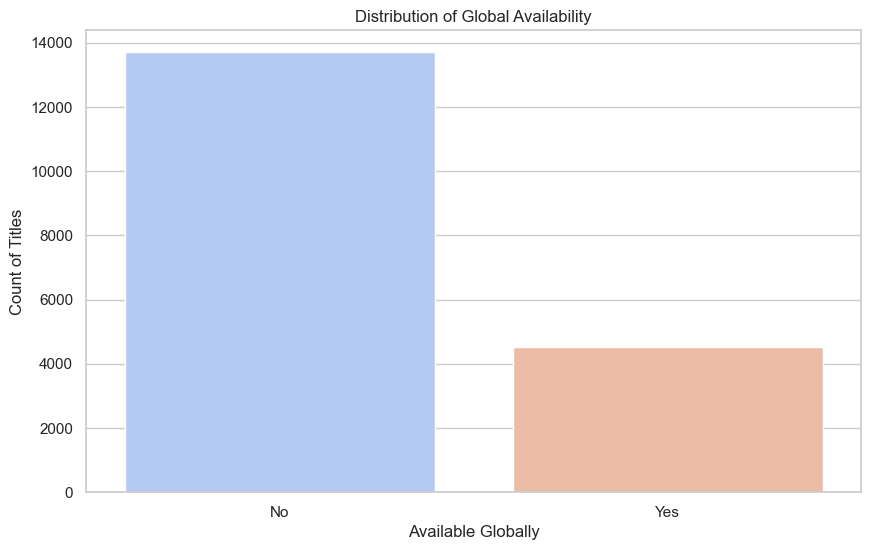

c:\Users\PhillipRashaad\.conda\envs\netflix_proj_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


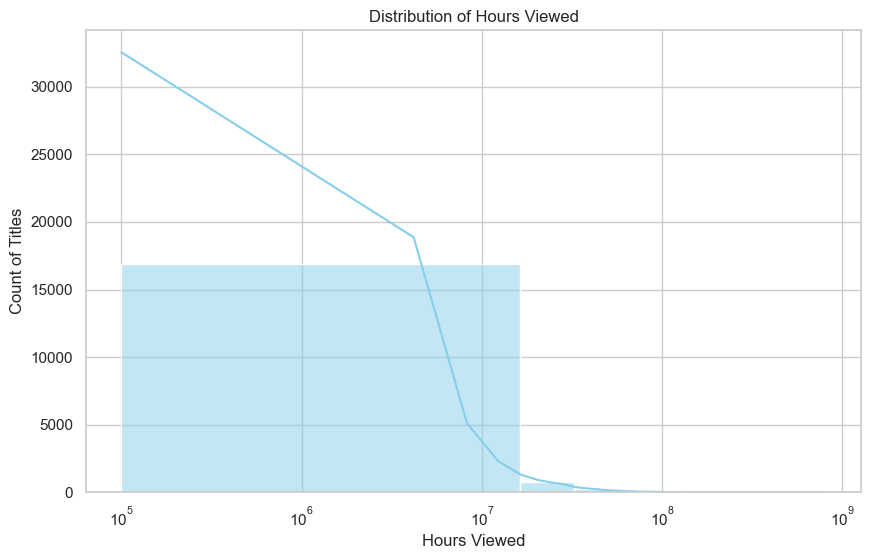

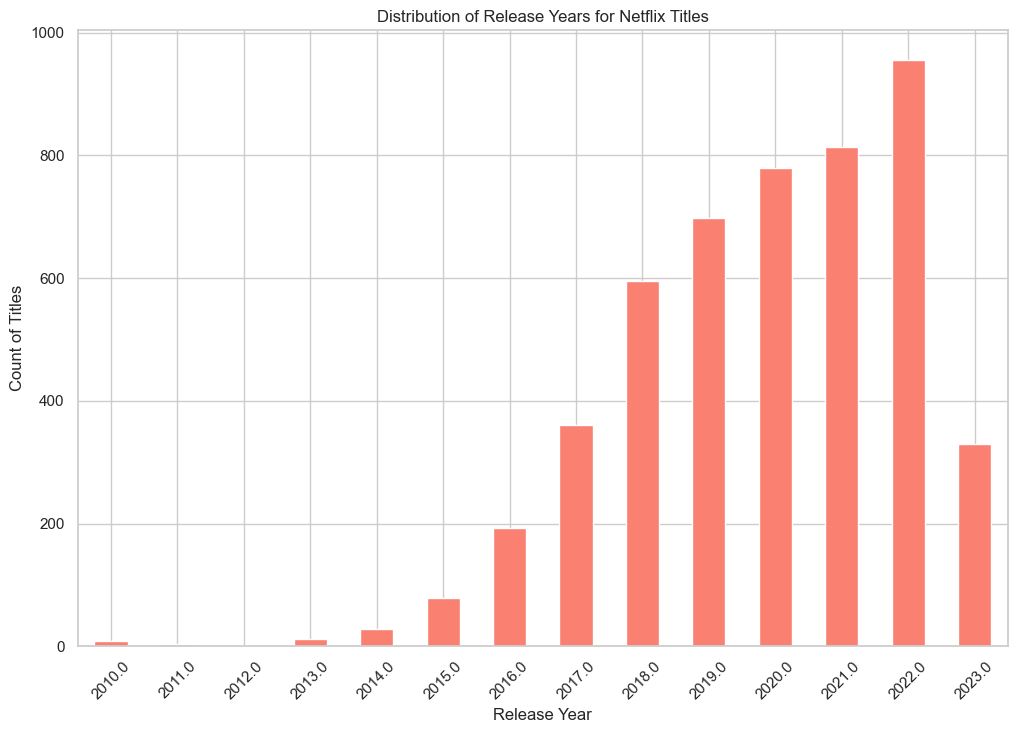

In [19]:
%matplotlib inline


import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set(style="whitegrid")

# Distribution of Global Availability
plt.figure(figsize=(10, 6))
sns.barplot(x=global_availability_counts.index, y=global_availability_counts.values, palette="coolwarm")
plt.title('Distribution of Global Availability')
plt.xlabel('Available Globally')
plt.ylabel('Count of Titles')
plt.show()

# Viewership Distribution
plt.figure(figsize=(10, 6))
sns.histplot(netflix_data['hours_viewed'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Hours Viewed')
plt.xlabel('Hours Viewed')
plt.ylabel('Count of Titles')
plt.xscale('log')  # Using logarithmic scale due to wide distribution
plt.show()

# Release Year Distribution
plt.figure(figsize=(12, 8))
release_year_counts.plot(kind='bar', color='salmon')
plt.title('Distribution of Release Years for Netflix Titles')
plt.xlabel('Release Year')
plt.ylabel('Count of Titles')
plt.xticks(rotation=45)
plt.show()


# 3. Data Cleaning and Preprocessing

## 3A. Data Cleaning
### Helper Functions

- **remove_special_characters**: Removes all special characters from a string and converts it to lowercase.
- **remove_season**: Removes the word "season" from the title string.
- **parse_season_number**: Parses the season number from the title string and returns it as an integer.
- **contains_numbers**: Checks if a title string contains any numerical values and returns a boolean value.
- **char_len**: Counts the number of characters in the title string and returns an integer.


### Data Cleaning Steps

1. **remove_special_characters**: Applied to the "Title" column to create the "Clean_Title" column.
2. **remove_season**: Applied to remove the word "season" from titles.
3. **parse_season_number**: Extracted season numbers from titles and recorded them in the "Season_Num" column.
4. **contains_numbers**: Checked for numerical values in titles to aid in cleaning.
5. **char_len**: Used to filter out short titles, ensuring only meaningful titles were retained.

In [20]:
#Copy Netflix data to new df for easier reference and recoverability
netflix_clean_df = netflix_df.copy()

print(netflix_clean_df.shape)

netflix_clean_df.head()

(18214, 4)


,title,available_globally,release_date,hours_viewed
0,The Night Agent: Season 1,Yes,2023-03-23,812100000
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000
3,Wednesday: Season 1,Yes,2022-11-23,507700000
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000


In [21]:
from utils.netflix_data_cleaner_tools import remove_special_characters

#Use function to create clean title column
netflix_clean_df['Clean_Title'] = netflix_clean_df['title'].apply(remove_special_characters)

print(netflix_clean_df.shape)

netflix_clean_df.head()

(18214, 5)


,title,available_globally,release_date,hours_viewed,Clean_Title
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,the night agent season 1
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,ginny georgia season 2
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,the glory season 1 1
3,Wednesday: Season 1,Yes,2022-11-23,507700000,wednesday season 1
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000,queen charlotte a bridgerton story


In [22]:
from utils.netflix_data_cleaner_tools import remove_season

#Use function to create remove season info
netflix_clean_df['Clean_Title'] = netflix_clean_df['Clean_Title'].apply(remove_season)

print(netflix_clean_df.shape)

netflix_clean_df.head()

(18214, 5)


,title,available_globally,release_date,hours_viewed,Clean_Title
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,the night agent
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,ginny georgia
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,the glory
3,Wednesday: Season 1,Yes,2022-11-23,507700000,wednesday
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000,queen charlotte a bridgerton story


In [23]:
from utils.netflix_data_cleaner_tools import parse_season_number

#Use function to create Season_Num column
netflix_clean_df['Season_Num'] = netflix_clean_df['title'].apply(parse_season_number)

print(netflix_clean_df.shape)

netflix_clean_df.head()

(18214, 6)


,title,available_globally,release_date,hours_viewed,Clean_Title,Season_Num
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,the night agent,1.0
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,ginny georgia,2.0
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,the glory,1.0
3,Wednesday: Season 1,Yes,2022-11-23,507700000,wednesday,1.0
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000,queen charlotte a bridgerton story,NaN


In [24]:
from utils.netflix_data_cleaner_tools import contains_numbers

#Use function to create Contains_Numbers column
netflix_clean_df['Contains_Numbers'] = netflix_clean_df["title"].apply(contains_numbers)

print(netflix_clean_df.shape)

netflix_clean_df.head()

(18214, 7)


,title,available_globally,release_date,hours_viewed,Clean_Title,Season_Num,Contains_Numbers
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,the night agent,1.0,True
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,ginny georgia,2.0,True
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,the glory,1.0,True
3,Wednesday: Season 1,Yes,2022-11-23,507700000,wednesday,1.0,True
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000,queen charlotte a bridgerton story,NaN,False


In [26]:
from utils.netflix_data_cleaner_tools import char_len

#Use function to create Clean_Title_Char_Len column
netflix_clean_df['Clean_Title_Char_Len'] = netflix_clean_df["Clean_Title"].apply(char_len)

print(netflix_clean_df.shape)

netflix_clean_df.head()

(18214, 8)


,title,available_globally,release_date,hours_viewed,Clean_Title,Season_Num,Contains_Numbers,Clean_Title_Char_Len
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,the night agent,1.0,True,15
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,ginny georgia,2.0,True,14
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,the glory,1.0,True,9
3,Wednesday: Season 1,Yes,2022-11-23,507700000,wednesday,1.0,True,9
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000,queen charlotte a bridgerton story,NaN,False,34


STATS:
 count    18214.000000
mean        20.489129
std         13.594328
min          0.000000
25%         11.000000
50%         17.000000
75%         26.000000
max        182.000000
Name: Clean_Title_Char_Len, dtype: float64


<AxesSubplot:>

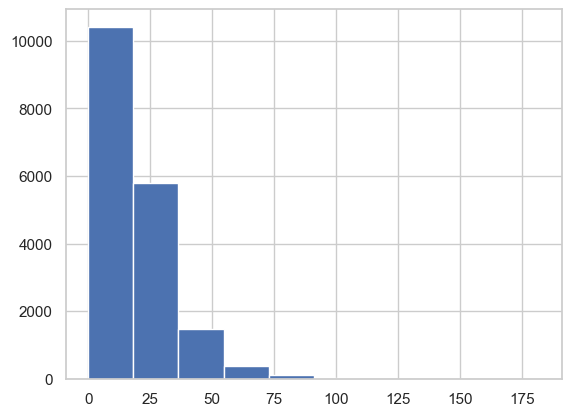

In [29]:
#View char len hist
print('STATS:\n',netflix_clean_df['Clean_Title_Char_Len'].describe())
netflix_clean_df['Clean_Title_Char_Len'].hist()

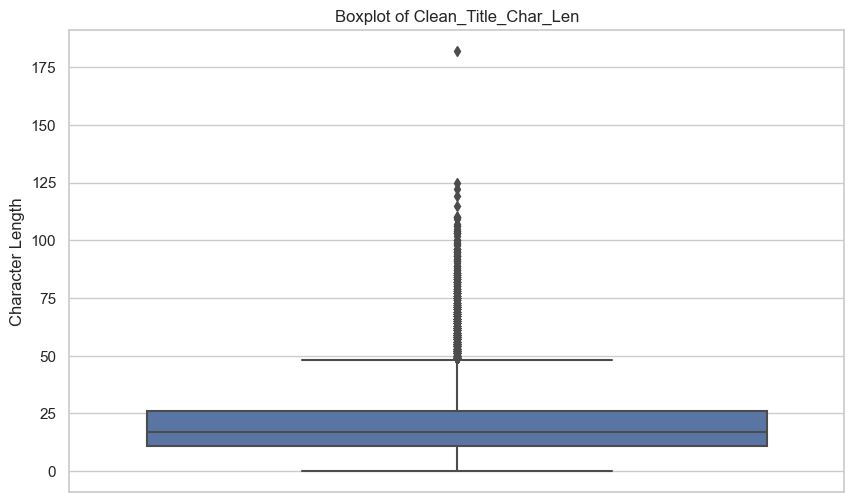

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y=netflix_clean_df['Clean_Title_Char_Len'])
plt.title('Boxplot of Clean_Title_Char_Len')
plt.ylabel('Character Length')
plt.show()


In [32]:
#Save to clean data csv

#Save to csv
netflix_clean_df.to_csv("03 - CLEANED_DATA - Netflix_Engagement_Data.csv", index= False)

## 3B. Data Preprocessing

- Evaluate **Clean_Titles** with char_len less than 10 so see if usable in LLM call.
- Filtered out all "Clean_Title" entries with a character length of less than 10, except for those with "Hours Viewed" greater than or equal to 700,000 (the median for the entire dataset). 
- A total of 465 records met the exception criteria.

**CRITERIA LOGIC:**
- MEDIAN: 700k Hours Viewed - Use the Hours Viewed Median because not influenced by outliers.
- Chose 10 char_len because I believed it contained enough signal to use in LLM call.
- Included high performing content (Hours Viewed >= 700k ) believed valuable & need to be included in dataset. 


In [33]:
#Evaluate clean_titles with char_len less than 10 so see if usable in LLM call

low_chars_netflix_df = netflix_clean_df[netflix_clean_df['Clean_Title_Char_Len']<=10].sort_values(by=['Clean_Title_Char_Len'], ascending=True).copy()


print(low_chars_netflix_df.shape)

#View the top 20 smallest char_len
low_chars_netflix_df.head(20)


(3726, 8)


,title,available_globally,release_date,hours_viewed,Clean_Title,Season_Num,Contains_Numbers,Clean_Title_Char_Len
18213,선생 김봉두,No,NaT,100000,,NaN,False,0
18205,أصحاب ...ولا أعزّ,No,2022-01-20,100000,,NaN,False,0
18206,الناموس: Season 1,No,NaT,100000,,1.0,True,0
18207,حكايات بنات الجزء ١: Season 2,No,NaT,100000,,2.0,True,0
5508,달의 연인 - 보보경심 려: Season 1,No,NaT,2400000,,1.0,True,0
18208,حكايات بنات الجزء ١: Season 3,No,NaT,100000,,3.0,True,0
18212,라디오 스타,No,NaT,100000,,NaN,False,0
14398,두다다쿵: Season 3,No,NaT,200000,,3.0,True,0
11354,침묵,No,NaT,400000,,NaN,False,0
1157,비상선언,No,NaT,18600000,,NaN,False,0


In [34]:
#View the bottom 20 char_len
low_chars_netflix_df.tail(20)

,title,available_globally,release_date,hours_viewed,Clean_Title,Season_Num,Contains_Numbers,Clean_Title_Char_Len
14451,88 Minutes,No,NaT,100000,88 minutes,NaN,True,10
8373,Safe Haven,No,NaT,900000,safe haven,NaN,False,10
4473,The A List: Season 2,Yes,2021-06-25,3500000,the a list,2.0,True,10
4469,Summertime: Season 1,Yes,2020-04-29,3500000,summertime,1.0,True,10
4465,Spell (2020),No,NaT,3500000,spell 2020,NaN,True,10
4446,Lilyhammer: Season 1,No,2012-02-06,3500000,lilyhammer,1.0,True,10
12004,New School: Season 3,No,NaT,300000,new school,3.0,True,10
4426,Gamer (2009),No,NaT,3500000,gamer 2009,NaN,True,10
4423,El Jeremías,No,NaT,3500000,el jeremas,NaN,False,10
4416,Confession // 자백,No,NaT,3500000,confession,NaN,False,10


In [35]:
netflix_clean_df['hours_viewed'].describe()

count    1.821400e+04
mean     5.130954e+06
std      1.871767e+07
min      1.000000e+05
25%      2.000000e+05
50%      7.000000e+05
75%      3.400000e+06
max      8.121000e+08
Name: hours_viewed, dtype: float64

In [40]:
import numpy as np
hours_median = np.median(netflix_clean_df['hours_viewed'])

hours_mean = np.mean(netflix_clean_df['hours_viewed'])

print(f'HOURS VIEWED MEDIAN: {hours_median}')

print(f'HOURS VIEWED MEAN: {hours_mean:.1f}')


HOURS VIEWED MEDIAN: 700000.0
HOURS VIEWED MEAN: 5130954.2


In [72]:
exceptions_df = netflix_clean_df[(netflix_clean_df['Clean_Title_Char_Len']<=10) & (netflix_clean_df['hours_viewed']>=700000)].sort_values(by=['Clean_Title_Char_Len'], ascending=True)

print(exceptions_df.shape)

#View the top 20 
exceptions_df.head(20)

(2151, 8)


,title,available_globally,release_date,hours_viewed,Clean_Title,Season_Num,Contains_Numbers,Clean_Title_Char_Len
1157,비상선언,No,NaT,18600000,,NaN,False,0
6337,三国: Season 1 // 三國: 第 1 季,No,NaT,1800000,,1.0,True,0
5508,달의 연인 - 보보경심 려: Season 1,No,NaT,2400000,,1.0,True,0
2811,3%: Season 1,Yes,2016-11-24,6800000,3,1.0,True,1
3818,3%: Season 2,Yes,2018-04-27,4500000,3,2.0,True,1
5273,3%: Season 4,Yes,2020-08-14,2500000,3,4.0,True,1
4970,3%: Season 3,Yes,2019-06-07,2800000,3,3.0,True,1
2356,Mo: Season 1,Yes,2022-08-24,8500000,mo,1.0,True,2
6119,PK,No,NaT,1900000,pk,NaN,False,2
6167,Adú,No,2020-06-30,1800000,ad,NaN,False,2


In [73]:
#View the top 20 
exceptions_df.tail(20)

,title,available_globally,release_date,hours_viewed,Clean_Title,Season_Num,Contains_Numbers,Clean_Title_Char_Len
7139,GoodFellas,No,NaT,1300000,goodfellas,NaN,False,10
3221,Fairy Tail: Season 1,No,NaT,5700000,fairy tail,1.0,True,10
6996,RocknRolla,No,NaT,1400000,rocknrolla,NaN,False,10
3441,Bordertown: Season 1 // Sorjonen: Kausi 1,No,2017-03-31,5200000,bordertown,1.0,True,10
7042,The Reader,No,NaT,1400000,the reader,NaN,False,10
3394,Aggretsuko: Season 5 // アグレッシブ烈子: シーズン5,No,2023-02-16,5300000,aggretsuko,5.0,True,10
3371,Power (2014): Season 1,No,NaT,5400000,power 2014,1.0,True,10
7060,Versailles: Season 2,No,NaT,1400000,versailles,2.0,True,10
7069,You Me Her: Season 2,No,2017-06-15,1400000,you me her,2.0,True,10
3212,Biohackers: Season 1,Yes,2020-08-20,5700000,biohackers,1.0,True,10


## 3C. EDA: Preprocssed Data

QUESTIONS:
1. How many titles are duplicated?
    - Duplicated Titles: 1,144 (7.3%)
    - Non-Duplicated Titles: 14,452 (92.7%)
2. What are the top 20 most duplicated titles?



In [41]:
netflix_clean_df.head()

,title,available_globally,release_date,hours_viewed,Clean_Title,Season_Num,Contains_Numbers,Clean_Title_Char_Len
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,the night agent,1.0,True,15
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,ginny georgia,2.0,True,14
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,the glory,1.0,True,9
3,Wednesday: Season 1,Yes,2022-11-23,507700000,wednesday,1.0,True,9
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000,queen charlotte a bridgerton story,NaN,False,34


### 3C-1. HOW MANY TITLES ARE DUPLICATED?

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_clean_title_counts(df, column_name):
    """
    Plots a bar chart showing the count of titles that appear exactly once and more than once,
    with percentage labels on the bars.
    
    Parameters:
    df (pd.DataFrame): The dataframe containing the data.
    column_name (str): The name of the column to analyze.
    """
    # Step 1: Get the value counts of the specified column
    title_counts = df[column_name].value_counts()

    # Step 2: Calculate the counts for titles that appear exactly once and more than once
    count_equal_to_one = (title_counts == 1).sum()
    count_greater_than_one = (title_counts > 1).sum()

    # Create a dataframe for plotting
    count_data = pd.DataFrame({
        'Category': ['Exactly Once', 'More Than Once'],
        'Count': [count_equal_to_one, count_greater_than_one]
    })

    # Calculate the percentages
    total = count_data['Count'].sum()
    count_data['Percentage'] = (count_data['Count'] / total) * 100

    # Step 3: Plot the bar chart
    plt.figure(figsize=(8, 6))
    bar_plot = sns.barplot(x='Category', y='Count', data=count_data)

    # Step 4: Add percentage labels on the bars
    for p in bar_plot.patches:
        height = p.get_height()
        bar_plot.annotate(f'{height:.0f}\n({height/total:.1%})',
                          (p.get_x() + p.get_width() / 2., height),
                          ha='center', va='bottom')

    # Customize the plot
    plt.title('Count of Clean Titles')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.ylim(0, max(count_data['Count']) * 1.1)  # Add some space above the highest bar

    # Display the plot
    plt.show()


In [48]:
import pandas as pd

# Assuming netflix_clean_df is already defined and contains the column 'Clean_Title'

# Step 1: Get the value counts of 'Clean_Title'
title_counts = netflix_clean_df['Clean_Title'].value_counts()

# Step 2: Calculate the counts for titles that appear exactly once and more than once
count_equal_to_one = (title_counts == 1).sum()
count_greater_than_one = (title_counts > 1).sum()

# Print the results
print("Count of titles that appear exactly once (True count):", count_equal_to_one)
print("Count of titles that appear more than once (False count):", count_greater_than_one)


Count of titles that appear exactly once (True count): 14452
Count of titles that appear more than once (False count): 1144


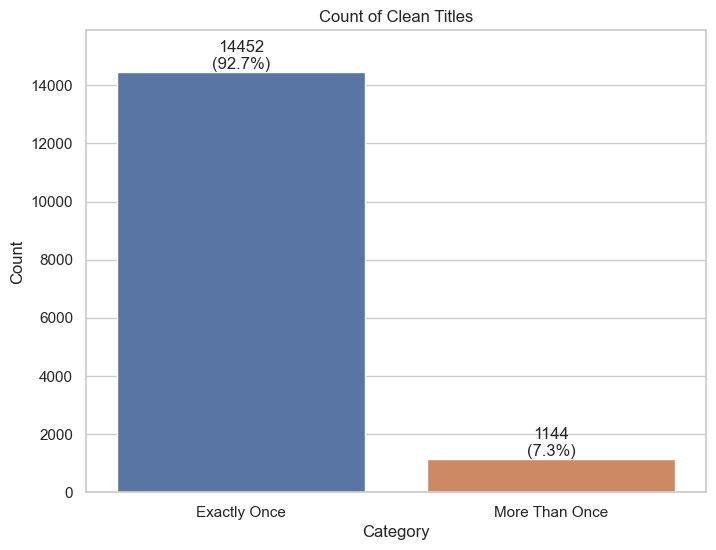

In [57]:
#How many titles are duplicated?
#from utils.netflix_data_cleaner_tools import plot_clean_title_counts

plot_clean_title_counts(netflix_clean_df, 'Clean_Title')


### 3C-2. WHAT ARE THE TOP 20 MOST DUPLICATED TITLES?

In [42]:
#View how many clean titles are repeated
netflix_clean_df['Clean_Title'].value_counts()[:20]

Clean_Title
naruto shippuden                    21
greys anatomy                       19
                                    17
heartland 2007                      16
gogglebox                           16
ncis                                15
murdoch mysteries                   15
supernatural 2005                   15
its always sunny in philadelphia    15
archer 2009                         13
two and a half men                  12
the big bang theory                 12
trailer park boys                   12
upinipin                            11
shameless us                        11
the walking dead                    11
hubert und staller                  10
ranczo                              10
friends 1994                        10
solitary gourmet                    10
Name: count, dtype: int64

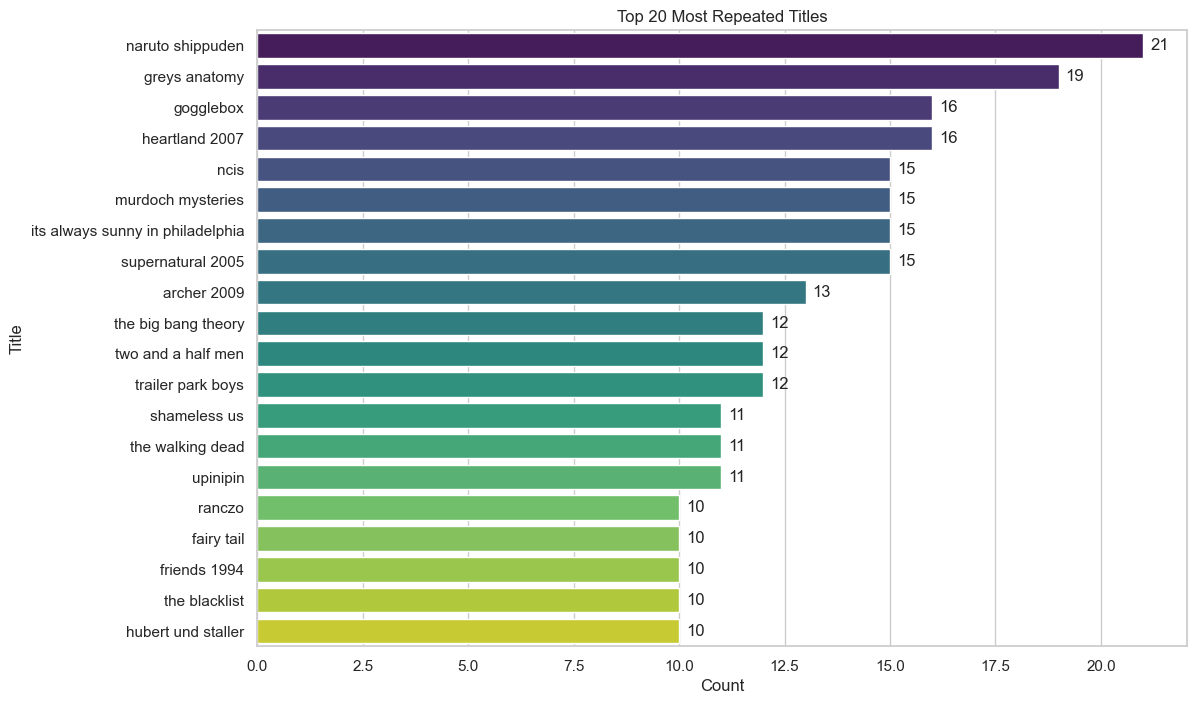

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_top_repeated_titles(df, column_name, top_n=20):
    """
    Plots a horizontal bar chart of the top N most repeated titles in the specified column,
    excluding blank string values.
    
    Parameters:
    df (pd.DataFrame): The dataframe containing the data.
    column_name (str): The name of the column to analyze.
    top_n (int): The number of top repeated titles to plot. Default is 20.
    """
    # Step 1: Filter out blank string values
    filtered_df = df[df[column_name] != ""]
    
    # Step 2: Get the value counts of the specified column
    title_counts = filtered_df[column_name].value_counts().head(top_n)
    
    # Create a dataframe for plotting
    count_data = pd.DataFrame({
        'Title': title_counts.index,
        'Count': title_counts.values
    })
    
    # Step 3: Plot the horizontal bar chart
    plt.figure(figsize=(12, 8))
    bar_plot = sns.barplot(x='Count', y='Title', data=count_data, palette='viridis')

    # Step 4: Add count labels on the bars
    for p in bar_plot.patches:
        bar_plot.annotate(f'{p.get_width():.0f}',
                          (p.get_width(), p.get_y() + p.get_height() / 2),
                          ha='left', va='center', xytext=(5, 0), textcoords='offset points')
    
    # Customize the plot
    plt.title(f'Top {top_n} Most Repeated Titles')
    plt.xlabel('Count')
    plt.ylabel('Title')
    
    # Display the plot
    plt.show()

# Example usage:
# Assuming netflix_clean_df is already defined and contains the column 'Clean_Title'
plot_top_repeated_titles(netflix_clean_df, 'Clean_Title')


## 3D. Collapsed Preprocessed Data

In [65]:
import pandas as pd

# Assuming netflix_clean_df is already defined and contains the column 'Clean_Title'

# Step 1: Get the value counts of 'Clean_Title'
title_counts = netflix_clean_df['Clean_Title'].value_counts().reset_index()

# Step 2: Rename the columns
title_counts.columns = ['Clean_Title', 'Title_Counts']

# Step 3: Assign the processed dataframe to netflix_processed_df
netflix_processed_df = title_counts

# Step 4: Filter out blank string values
netflix_processed_df = netflix_processed_df[netflix_processed_df['Clean_Title'] != ""].copy()

#Step 5: Use function to create Clean_Title_Char_Len column
from utils.netflix_data_cleaner_tools import char_len

netflix_processed_df['Clean_Title_Char_Len'] = netflix_processed_df["Clean_Title"].apply(char_len)

# Display the new dataframe
print(netflix_processed_df.shape)

netflix_processed_df.head()


(15595, 3)


,Clean_Title,Title_Counts,Clean_Title_Char_Len
0,naruto shippuden,21,16
1,greys anatomy,19,13
3,heartland 2007,16,14
4,gogglebox,16,9
5,ncis,15,4


In [66]:
#Save to csv

netflix_processed_df.to_csv('04 - PREPROCESSED_DATA - Netflix_Engagement_Data.csv', index=False)

In [67]:
#netflix_processed_df

#View char len stats
netflix_processed_df['Clean_Title_Char_Len'].describe()

count    15595.000000
mean        21.443027
std         14.115357
min          1.000000
25%         12.000000
50%         17.000000
75%         27.000000
max        182.000000
Name: Clean_Title_Char_Len, dtype: float64

<AxesSubplot:>

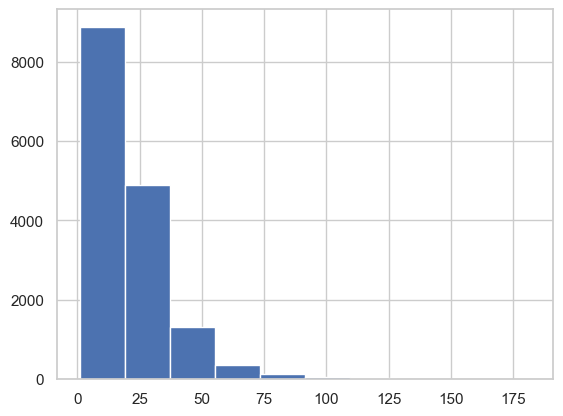

In [74]:
netflix_processed_df['Clean_Title_Char_Len'].hist()